
## **Name: Noor ul Ain Khurshid**



1. Adapt the code from the CNN tutorial to train a CNN classifier to classify sentiment of tweets for an airline. **The goal is just to classify positive and negative sentiments.** The neutral tweets should be removed.

Dataset: "Tweets.csv"
https://drive.google.com/file/d/1HZiNqwMp80aKlfPh6n8LB4TIxdj6hxN6/view?usp=sharing

Recommended percentage usage of data to preserve memory: **40% training 10% for testing.**

*   Testing CNN classifier with other online reviews (minimum 5) such from different websites
(You can just copy paste them in a variable and predict directly)
*   improving the test accuracy that is obtained by increasing the number of epochs

*   Shown performance measures such as confusion matrix, classification repor, etc
*   Experiment to include the neutral tweets. You might have to tweak the CNN model

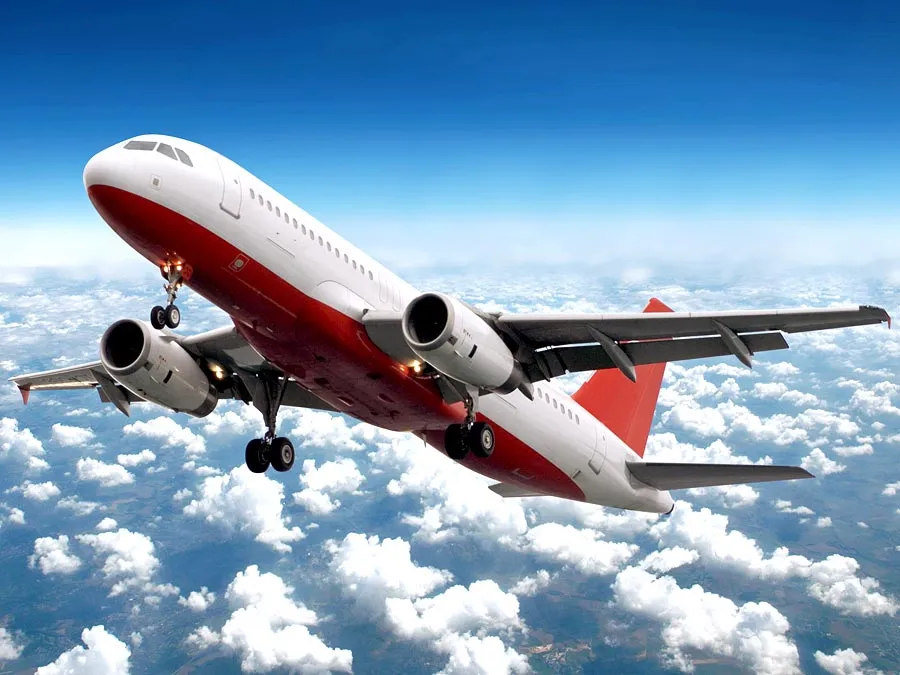

# **Hints:**

Below is a simple guide to get you started. You may **choose to include or  rewrite them**

## **1. Loading Data and a simple Exploratory Data Analysis (EDA)** 

In [1]:
import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from matplotlib import pyplot

import string
from nltk.corpus import stopwords
nltk.download('stopwords')

plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

from sklearn.model_selection import cross_val_score
import numpy as np
!pip install lime
from lime import lime_tabular
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

from tensorflow.keras.layers import Dense, Dropout

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=972ef59773834dc1b0a41feeca4ece8d186c1173a79e3df10640929bb3becd77
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
df =pd.read_csv('/content/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
# Unique values of sentiment
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

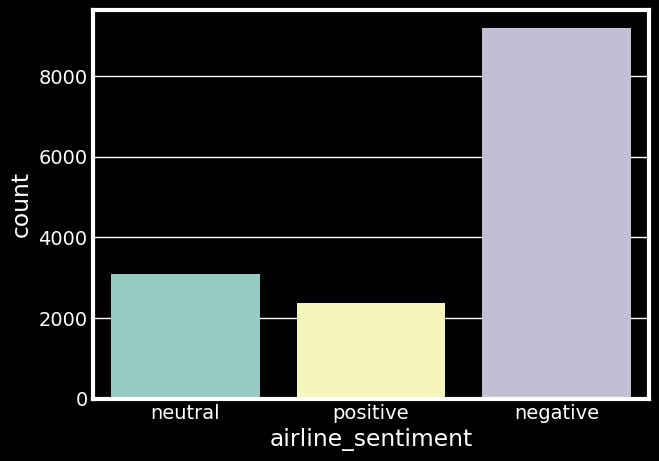

In [4]:
# Unique values of sentiment plot

ax = sns.countplot(x="airline_sentiment", data=df)

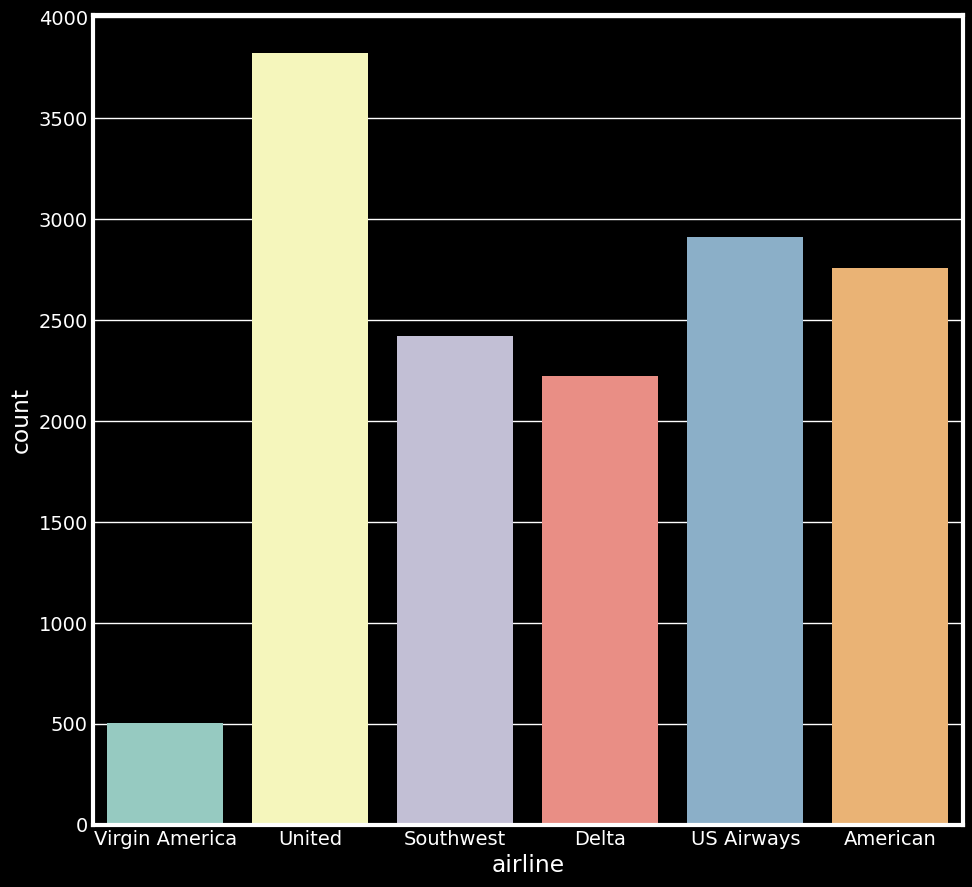

In [5]:
# Unique values of airline

plt.figure(figsize=(10,10))
ax = sns.countplot(x="airline", data=df)

## **2. Preprocessing/Cleaning**

In [6]:
# Tokenizing the tweet and also taking tokens from second index onwards as initital to gives airline name and '@' and lowering thm and later making it back a sentence
def clean_the_tweet(text):
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

                 

def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

  

In [7]:
# removing neutral tweets

df2 = df[df['airline_sentiment']!='neutral']
df2['cleaned_tweet'] = df2['text'].apply(clean_the_tweet)

df2.head()
df2['airline_sentiment'] = df2['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)
df2.head()

<ipython-input-7-cc8b0093c452>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cleaned_tweet'] = df2['text'].apply(clean_the_tweet)
<ipython-input-7-cc8b0093c452>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['airline_sentiment'] = df2['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),you ve added commercials to the experience tacky
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),s really aggressive to blast obnoxious enterta...
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),it s a really big bad thing about it
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),would pay a flight for seats that didn t have ...
6,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),nearly every time i fly vx this ear worm won t...


In [8]:
# Cleaning the tweets, removing punctuation marks
df2['cleaned_tweet'] = df2['cleaned_tweet'].apply(text_process)
df2.reset_index(drop=True, inplace = True)
df2.head()

<ipython-input-8-c3f6ef413367>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cleaned_tweet'] = df2['cleaned_tweet'].apply(text_process)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
0,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),added commercials experience tacky
1,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
2,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
3,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),would pay flight seats playing really bad thin...
4,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),nearly every time fly vx ear worm go away


In [9]:
df2['airline_sentiment'].unique()

array([1, 0])

## **3. Loading a pretrained Word2Vec model**

In [10]:
# From the nlpia package for downloading data too big for the repo

BIG_URLS = {
    'w2v': (
        'https://www.dropbox.com/s/965dir4dje0hfi4/GoogleNews-vectors-negative300.bin.gz?dl=1',
        1647046227,
    ),
    'slang': (
        'https://www.dropbox.com/s/43c22018fbfzypd/slang.csv.gz?dl=1',
        117633024,
    ),
    'tweets': (
        'https://www.dropbox.com/s/5gpb43c494mc8p0/tweets.csv.gz?dl=1',
        311725313,
    ),
    'lsa_tweets': (
        'https://www.dropbox.com/s/rpjt0d060t4n1mr/lsa_tweets_5589798_2003588x200.tar.gz?dl=1',
        3112841563,  # 3112841312,
    ),
    'imdb': (
        'https://www.dropbox.com/s/yviic64qv84x73j/aclImdb_v1.tar.gz?dl=1',
        3112841563,  # 3112841312,
    ),
}

In [11]:
!pip install pugnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.6/706.6 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 102.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.8 MB/s eta 0:00:00


In [12]:
!pip install urllib3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import os
import re
import tarfile
import tqdm

import requests

from pugnlp.futil import path_status, find_files

# These functions are part of the nlpia package which can be pip installed and run from there.
def dropbox_basename(url):
    filename = os.path.basename(url)
    match = re.findall(r'\?dl=[0-9]$', filename)
    if match:
        return filename[:-len(match[0])]
    return filename

def download_file(url, data_path='.', filename=None, size=None, chunk_size=4096, verbose=True):
    """Uses stream=True and a reasonable chunk size to be able to download large (GB) files over https"""
    if filename is None:
        filename = dropbox_basename(url)
    file_path = os.path.join(data_path, filename)
    if url.endswith('?dl=0'):
        url = url[:-1] + '1'  # noninteractive download
    if verbose:
        tqdm_prog = tqdm
        print('requesting URL: {}'.format(url))
    else:
        tqdm_prog = no_tqdm
    r = requests.get(url, stream=True, allow_redirects=True)
    size = r.headers.get('Content-Length', None) if size is None else size
    print('remote size: {}'.format(size))

    stat = path_status(file_path)
    print('local size: {}'.format(stat.get('size', None)))
    if stat['type'] == 'file' and stat['size'] == size:  # TODO: check md5 or get the right size of remote file
        r.close()
        return file_path

    print('Downloading to {}'.format(file_path))

    with open(file_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=chunk_size):
            if chunk:  # filter out keep-alive chunks
                f.write(chunk)

    r.close()
    return file_path

def untar(fname):
    if fname.endswith("tar.gz"):
        with tarfile.open(fname) as tf:
            tf.extractall()
    else:
        print("Not a tar.gz file: {}".format(fname))

/usr/local/lib/python3.10/dist-packages/pugnlp/constants.py:138: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.10/dist-packages/pugnlp/constants.py:160: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [16]:
download_file(BIG_URLS['w2v'][0])

requesting URL: https://www.dropbox.com/s/965dir4dje0hfi4/GoogleNews-vectors-negative300.bin.gz?dl=1
remote size: 1647046227
local size: None


'./GoogleNews-vectors-negative300.bin.gz'

In [17]:
from nltk.tokenize import TreebankWordTokenizer
from gensim.models.keyedvectors import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True, limit=200000)

VECTORIZATION AND TOKENIZATION

In [18]:
from nltk.tokenize import TreebankWordTokenizer
from gensim.models.keyedvectors import KeyedVectors
# from nlpia.loaders import get_data
# word_vectors = get_data('w2v', limit=200000)

def tokenize_and_vectorize(dataset):
    tokenizer = TreebankWordTokenizer()
    vectorized_data = []
    expected = []
    for sample in dataset:
        tokens = tokenizer.tokenize(sample[1])
        sample_vecs = []
        for token in tokens:
            try:
                sample_vecs.append(word_vectors[token])

            except KeyError:
                pass  # No matching token in the Google w2v vocab
            
        vectorized_data.append(sample_vecs)

    return vectorized_data

In [19]:
def collect_expected(dataset):
  """ Peel off the target values from the dataset """
  expected = []
  for sample in dataset:
    expected.append(sample[0])
  return expected

In [20]:
vectorized_data = tokenize_and_vectorize(df)
expected = collect_expected(df)

In [21]:
split_point = int(len(vectorized_data)*.4) #originally 0.8 only
split_point2 = int(len(vectorized_data)*.5)
x_train = vectorized_data[:split_point]
y_train = expected[:split_point]
x_test = vectorized_data[split_point:split_point2]
y_test = expected[split_point:split_point2]

In [22]:
len(y_test)

1

**4. CNN ARCHITECTURE**

In [56]:
maxlen = 400

#How many samples to show the net before backpropagating the error and updating the weights
batch_size = 32

#Length of the token vectors you’ll create for passing into the convnet
embedding_dims = 300

#Number of filters you’ll train
filters = 250

#The width of the filters; actual filters will each be a matrix of weights of size: 
# embedding_dims x kernel_size, or 50 x 3 in your case
kernel_size = 3

#Number of neurons in the plain feedforward net at
#the end of the chain
hidden_dims = 250

#Number of times you’ll pass the entire training dataset through the network
epochs = 4

In [57]:
# Manually pad/truncate

def pad_trunc(data, maxlen):
  """ For a given dataset pad with zero vectors or truncate to maxlen """
  new_data = []

  # Create a vector of 0's the length of our word vectors
  zero_vector = []
  for _ in range(len(data[0][0])):
      zero_vector.append(0.0)

  for sample in data:

      if len(sample) > maxlen:
          temp = sample[:maxlen]
      elif len(sample) < maxlen:
          temp = sample
          additional_elems = maxlen - len(sample)
          for _ in range(additional_elems):
              temp.append(zero_vector)
      else:
          temp = sample
      new_data.append(temp)
  return new_data

In [58]:
x_train = pad_trunc(x_train, maxlen)

In [59]:
x_test = pad_trunc(x_test, maxlen)

In [60]:
x_train = np.reshape(x_train, (len(x_train), maxlen, embedding_dims))

In [61]:
x_test = np.reshape(x_test, (len(x_test), maxlen, embedding_dims))

In [62]:
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = np.array(x_train)
x_test = np.array(x_test)

In [63]:
import numpy as np
from tensorflow import keras as keras
import tensorflow as tf

#A helper module to handle padding input
from keras.preprocessing import sequence

#The base Keras neural network model
from keras.models import Sequential

#The layer objects you’ll pile into the model
from keras.layers import Dense, Dropout, Activation
#Your convolution layer, and pooling
from keras.layers import Conv1D, GlobalMaxPooling1D


In [64]:
model = Sequential()
model.add(Conv1D(
    filters,
    kernel_size,
    padding='valid',
    activation='relu',
    strides=1,
    input_shape=(maxlen, embedding_dims)))
print('Build model...')


Build model...


POOLING

In [65]:
model.add(GlobalMaxPooling1D())


DROPOUT

In [66]:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

CLASSIFIER AND COMPILING

In [67]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])

TRANSFORMING THE DATA

In [70]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [71]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/4
1/1 [==============================] - 1s 1s/step - loss: 0.6569 - accuracy: 0.8333 - val_loss: 0.6125 - val_accuracy: 1.0000
Epoch 2/4
1/1 [==============================] - 0s 38ms/step - loss: 0.5515 - accuracy: 0.8333 - val_loss: 0.5722 - val_accuracy: 1.0000
Epoch 3/4
1/1 [==============================] - 0s 36ms/step - loss: 0.4230 - accuracy: 0.8333 - val_loss: 0.5305 - val_accuracy: 1.0000
Epoch 4/4
1/1 [==============================] - 0s 47ms/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.4950 - val_accuracy: 1.0000


In [94]:
len(y_train)

6

In [73]:
model_structure = model.to_json()
with open("cnn_model.json", "w") as json_file:
  json_file.write(model_structure)
model.save_weights("cnn_weights.h5")

USING THE MODEL IN A PIPELINE

In [74]:
x_train[0]

array([[-0.23339844,  0.06152344, -0.3046875 , ..., -0.18359375,
        -0.15039062,  0.10986328],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [75]:
from keras.models import model_from_json
with open("cnn_model.json", "r") as json_file:
  json_string = json_file.read()
model = model_from_json(json_string)
model.load_weights('cnn_weights.h5')

NOW TESTING THE MODEL USING SAMPLE DATA

In [95]:
sample_1 = """A big bad long flight."""

In [96]:
vec_list = tokenize_and_vectorize([(1, sample_1)])

In [97]:
test_vec_list = pad_trunc(vec_list, maxlen)

In [98]:
test_vec = np.reshape(test_vec_list, (len(test_vec_list), maxlen, embedding_dims))

In [99]:
model.predict(test_vec)

1/1 [==============================] - 0s 21ms/step


array([[0.66677797]], dtype=float32)

In [100]:
y_predict = np.argmax(model.predict(test_vec), axis=-1)
if y_predict < 0.5:
  print('Predicted Negative Sentiment with label 0')
else:
  print('Predicted Positive Sentiment with label 1')


1/1 [==============================] - 0s 21ms/step
Predicted Negative Sentiment with label 0
